<a href="https://colab.research.google.com/github/JD314/fisica_experimental/blob/master/notebooks/0.1_Distribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://www.udea.edu.co/wps/wcm/connect/udea/99fc43e7-7a64-45bd-97fc-96639b70813d/logosimbolo-vertical.png?MOD=AJPERES&CVID=ljeLvHr" align="left" hspace="10px" ></p>

<h1><b>Tarea 1: Físisca experimental <b></h1>

---
<div align="right">
<font size=3>
José David Bernal Restrepo <br>
1018342557
</font>
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import norm

In [ ]:
# -- Lectura de datos --
diametros = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQSidQdK3JoPyvo5oMZikN26SZu_ocydulnYxO_p0nAdaFYPIY6X4adF0iVQH-HziuOJRyVaH7gRObC/pub?output=csv"
conteo = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ3bJHnZMP9gq_j1EB8XgDV5qu5ymJvzLexHH7QoKxyrKhSmTxBBAYzyuCtJCt_FZYbkBD8ANAPW4Fz/pub?output=csv"
diametros = pd.read_csv(diametros)
conteo = pd.read_csv(conteo)

#Distribución Gaussiana


1. Graficar el conjunto de medidas de diámetros de canicas que su grupo tomó (un histograma) y analizar la
distribución de los datos. ¿Tiene la forma de una distribución Gaussiana? ¿Son suficientes datos para dar alguna
conclusión? Reporte las variables de tendencia central ($\bar x, s$).

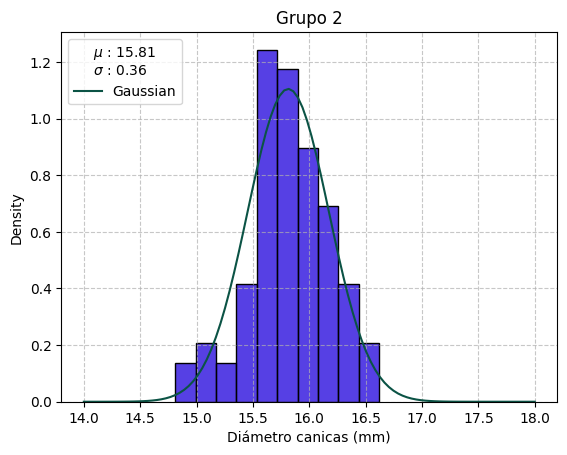

In [ ]:
def distribucion(df=diametros, columna='diametros_g1', normal=False, color='#1d00dc', title='', gcolor="#0B5345"):
    """función para graficar un histograma
    de los datos de las canicas"""

    sns.histplot(data=df, x=f'{columna}', stat='density', color=color)

    plt.title(title)
    plt.xlabel('Diámetro canicas (mm)')

    # Medidas de tendencia central
    media = df[columna].mean()
    std = df[columna].std()

    plt.grid(True, linestyle='--', alpha=0.7)

    if normal == True:
        rango = np.linspace(14, 18, 100)
        normal_ = norm.pdf(rango, media, std)
        sns.lineplot(x=rango, y=normal_, label='Gaussian', color=gcolor)

    # -- Mostrar media y desviacion estandar --
    legend_text = f'$\mu$ : {media :.2f} \n$\sigma $ : {std :.2f}'
    plt.legend(loc='upper left', title=legend_text)

# Grupo 2
distribucion(columna='Diametro_g2', normal=True, title='Grupo 2')
plt.show()


2 .Repita el proceso del ítem anterior, pero usando la totalidad de los datos disponibles en la tabla de Excel.

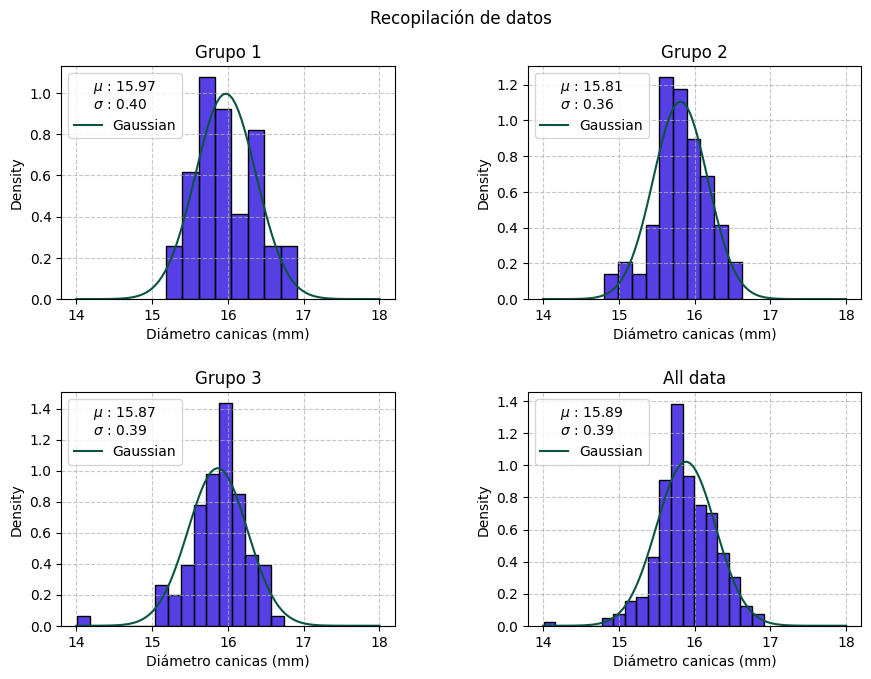

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
distribucion(columna='Diametro_g1', title='Grupo 1', normal=True)

plt.subplot(2,2,2)
distribucion(columna='Diametro_g2', title='Grupo 2', normal=True)

plt.subplot(2,2,3)
distribucion(columna='Diametro_g3', title='Grupo 3', normal=True)

plt.subplot(2,2,4)
# -- Ajustes de todos los datos --
all = diametros.melt()
distribucion(df=all, columna='value', title='All data', normal=True)

plt.suptitle('Recopilación de datos')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()